# Customer Churn Prediction Using Telecom Dataset

# Introduction of the problem and the Dataset

Customer churn is a major challenge faced by many businesses, including telecommunication companies. Churn refers to the rate at which customers change or discontinue their services, which leads to a loss of revenue for the businesses. The goal of this project is to develop different predictive models to accurately classify whether a customer is likely to churn based on the available features.
For this project the Telco Customer Churn dataset from Kaggle is used which provides valuable insights into customer churn in the telecommunication industry. This dataset contains the information about a fictional telco company that provided home phone and Internet services to 7044 customers in California in the 3rd Quarter (July to September). It indicates which customers have left, stayed, or signed up for their service.
By identifying the potential features which contribute to the customer churn we can develop an effective churn prediction models using machine learning which can help businesses take charge to hold on to the customers and improve their satisfaction.

Loading the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,auc

# Loading the Dataset
[Kaggle DataSet](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [2]:
my_data= pd.read_csv("C:/Users/Admin/OneDrive - University of Essex/MA336/project/2211606/customer_churn.csv")

# Preliminary Analysis of the Dataset

This dataset consists of  7044 rows and 21 columns, like:
CustomerID - Unique identifier for each customer/client
Gender - the gender of each customer/client (Male or Female)
Senior Citizen - if the customer/client is a senior citizen (1 or 0)
Partner - if there is a partner with the customer/client  (Yes or No)
Dependents - if the customer/client has any dependents (Yes or No)
Tenure - Number of months the customer/client has stayed with the service
PhoneService - if the customer/client has a phone service (Yes or No) with the company
Internet Service - if the customer/client has an internet service provider (DSL, Fiber optic, or No)
Streaming TV - if the customer/client has streaming TV service (Yes or No)
Monthly Charges - The amount charged monthly  to the customer/client by the company
Total Charges - The total charges the customer/client needs to pay for using the service.
Churn - if the customer/client has churned or not (Yes or No)

In [3]:
my_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
my_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Visualizing the target variable 'Churn'

26.54
73.46


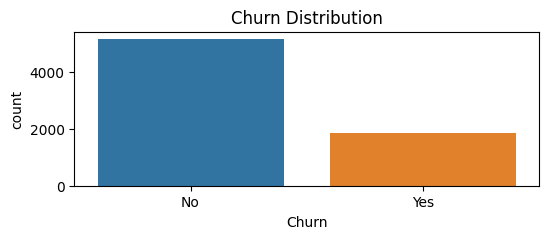

In [5]:
# customers who will churn
yes_churn_count = my_data[my_data.Churn == 'Yes'].shape[0]
# customers who will not churn 
no_churn_count = my_data[my_data.Churn == 'No'].shape[0]
# Percentage of customers that will churn
yes_churn_percent = round((yes_churn_count / (yes_churn_count + no_churn_count) * 100),2)
# Percentage of customers that will not churn (retain)
no_churn_percent = round((no_churn_count / (yes_churn_count + no_churn_count) * 100 ),2)
plt.figure(figsize=(6, 2))
sns.countplot(x='Churn', data=my_data)
plt.title('Churn Distribution')
plt.show
print(yes_churn_percent)
print(no_churn_percent )

73.46% customers didn't churn where as 26.54% of customers churned

Visualizing the categorical columns 

Churn on Gender

Text(0.5, 1.0, 'Genders on customer churn')

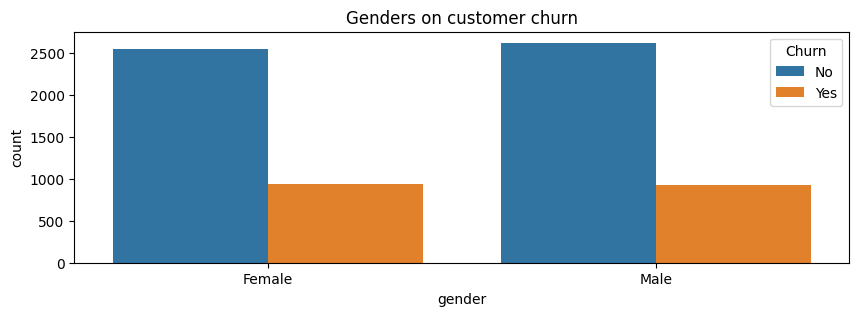

In [6]:
plt.figure(figsize=(10,3))
churn_by_gender_plot = sns.countplot(x= 'gender', hue='Churn', data=my_data)
churn_by_gender_plot.set_title('Genders on customer churn')

Churn on Senior Citizens

Text(0.5, 0, 'SeniorCitizens(0: No, 1: Yes)')

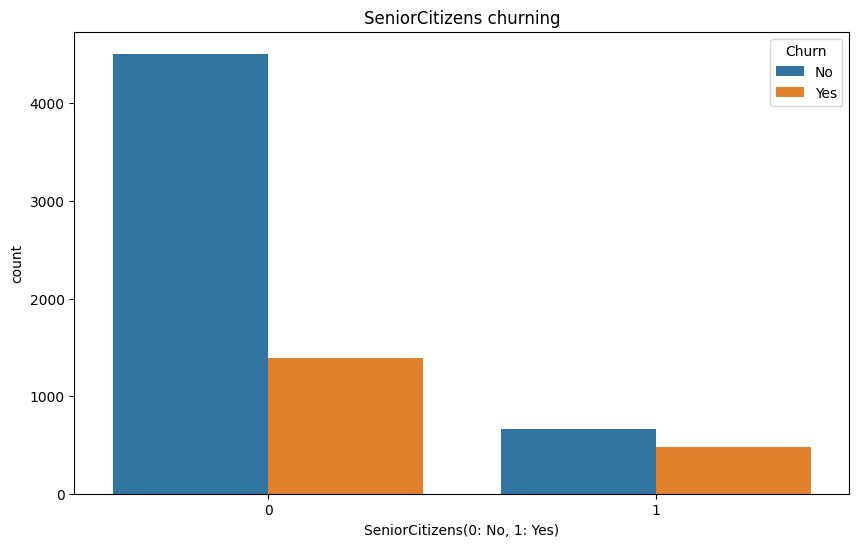

In [7]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'SeniorCitizen', hue='Churn', data=my_data)
ax.set_title(f'SeniorCitizens churning')
plt.xlabel('SeniorCitizens(0: No, 1: Yes)')

Churn on Internet Service  

Text(0.5, 1.0, 'How internet service affects customer churn')

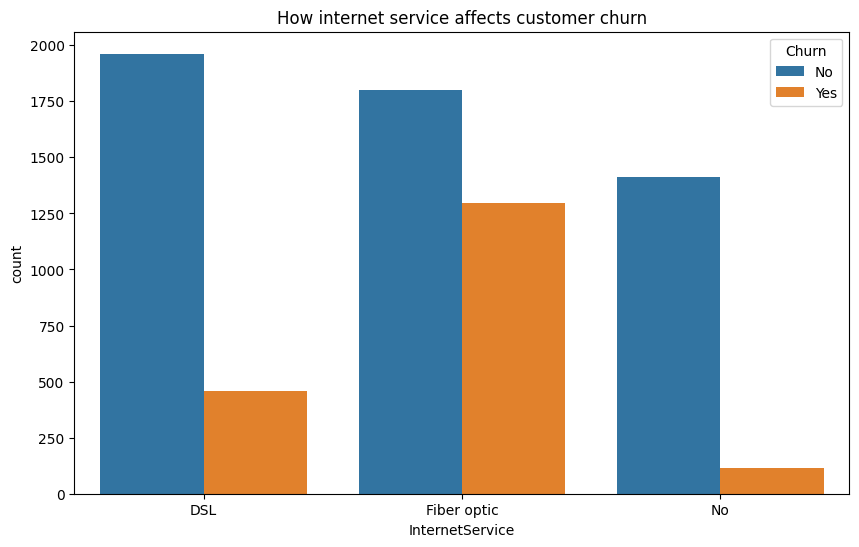

In [8]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'InternetService', hue='Churn', data=my_data)
ax.set_title(f'How internet service affects customer churn')

Churn on Tenure

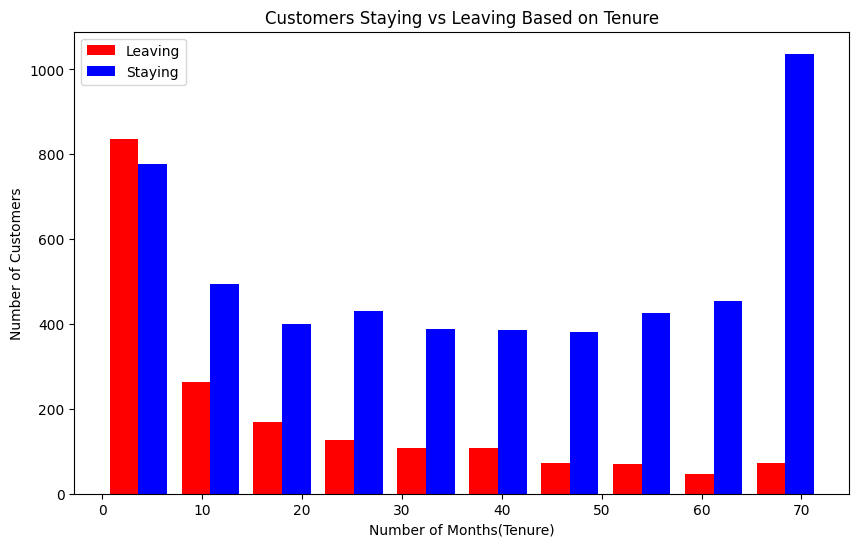

In [9]:
yes_tenure_churn = my_data[my_data.Churn == 'Yes'].tenure
no_tenure_churn = my_data[my_data.Churn == 'No'].tenure

plt.figure(figsize=(10,6))
plt.hist([yes_tenure_churn, no_tenure_churn], color=['red', 'blue'], label= ['Leaving', 'Staying'])
plt.xlabel('Number of Months(Tenure)')
plt.ylabel('Number of Customers')
plt.title('Customers Staying vs Leaving Based on Tenure')
plt.legend()

Churn on Monthly Charges  

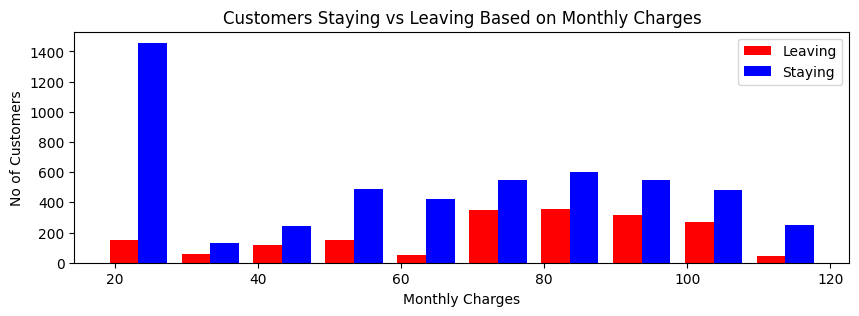

In [10]:
yes_monthly_charges_churn = my_data[my_data.Churn == 'Yes'].MonthlyCharges
no_monthly_charges_churn = my_data[my_data.Churn == 'No'].MonthlyCharges


plt.figure(figsize=(10,3))
plt.hist([yes_monthly_charges_churn, no_monthly_charges_churn], color=['red', 'blue'], label= ['Leaving', 'Staying'])
plt.xlabel('Monthly Charges')
plt.ylabel('No of Customers')
plt.title('Customers Staying vs Leaving Based on Monthly Charges')
plt.legend()

# Data Cleaning & Preprocessing

checking no. of null values in the dataset

In [11]:
null_counts=my_data.isnull().sum()
print(null_counts)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


For all variables,we are getting isnull sum as '0', means that none of the variables have NA values.If there were any NA values in the dataset, we could remove them by using my_data.dropna(subset=my_data.columns, inplace=True)

converting total charges into float because it is an object

In [12]:
my_data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

the total charges are in a string so converting to numeric,but some values are not numbers but seem to be blank strings 

In [13]:
#number of blank strings
pd.to_numeric(my_data.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [14]:
# converted TotalCharges to numbers
pd.to_numeric(my_data['TotalCharges'], errors='coerce') # If ‘coerce’, then invalid parsing will be set as NaN.

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [15]:
my_data[pd.to_numeric(my_data['TotalCharges'], errors='coerce').isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
# Convert TotalCharges to numeric
my_data['TotalCharges'] = pd.to_numeric(my_data['TotalCharges'], errors='coerce')

In [17]:
# finding the rows where TotalCharges is NA
# around 0.16 % of all data
my_data[pd.to_numeric(my_data['TotalCharges'], errors='coerce').isna()].shape 

(11, 21)

In [18]:
my_data.TotalCharges = pd.to_numeric(my_data['TotalCharges'], errors='coerce')

# Feature Selection

It's not necessary that all the given features are going to help predict customer churn. In our case customer id is one of those features which will not add any value to our analysis or the model's accuracy. So let's remove the customer id column from the dataset.

In [19]:
# dropping customer ID as it's not needed for this project,so I'll remove it
my_data1=my_data.drop(['customerID'], axis=1, inplace=True)

In [20]:
# around 0.16% of data will be dropped 
my_data1 = my_data.copy()
my_data1.dropna(inplace=True)

In [21]:
#calculating the number of missing values
my_data1.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
#checking the data types
my_data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Transform Categorical Values 

As most of the columns have values 'Yes', 'No' , 'No phone service, 'No internet service' etc
We will print all the unique values for categorical columns and then replace the duplicate categories like 'No phone service' and 'No internet service' with simple 'No'.
Once we get yes and no categories then, we can convert them into numeric format (Yes: 1, No: 0)
This is called as one Hot Encoding.

In [23]:
def print_unique_values(my_data):
       for column in my_data:
            if my_data[column].dtypes=='object':
                print(f'{column}: {my_data[column].unique()}') 
print_unique_values(my_data1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [24]:
my_data1.replace('No internet service','No',inplace=True)
my_data1.replace('No phone service','No',inplace=True)

In [25]:
print_unique_values(my_data1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [26]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    my_data1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [27]:
for col in my_data1:
    print(f'{col}: {my_data1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [28]:
my_data1['gender'].replace({'Female':1,'Male':0},inplace=True)
my_data1.gender.unique()

array([1, 0], dtype=int64)

In [29]:
# Create my_data2 for cleaned dataset
my_data2 = pd.get_dummies(data=my_data1, columns=['InternetService','Contract','PaymentMethod'])
my_data2.columns
print(f'So we have added {my_data2.shape[1]- my_data1.shape[1]} more columns to our list. New shape : {my_data2.shape}')
my_data2.sample(5)

So we have added 7 more columns to our list. New shape : (7032, 27)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6940,1,0,1,1,72,0,0,1,1,1,...,True,False,False,False,False,True,False,True,False,False
775,1,0,1,0,72,1,1,1,1,1,...,False,True,False,False,False,True,False,True,False,False
2208,1,1,1,0,1,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
1975,0,0,0,0,21,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
3211,1,0,0,0,17,1,0,0,0,0,...,False,False,True,False,True,False,False,True,False,False


# Scaling & Normalization

Here we are going to identify the features which need scaling and scale them using sklearn's MinMaxScaler. Scaling is used for standardizing the range of input features so that the machine learning model can quickly learn from the data. In this case features  like tenure, MonthlyCharges and TotalCharges need scaling.

In [30]:
col_to_sl=['tenure','MonthlyCharges',"TotalCharges"]
scaler=MinMaxScaler()
my_data2[col_to_sl]=scaler.fit_transform(my_data2[col_to_sl])
for col in my_data2:
    print(f'{col}: {my_data2[col].unique()}')
my_data2[col_to_sl].describe()

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,0.442560,0.463166,0.261309
std,0.345708,0.299363,0.261571
min,0.000000,0.000000,0.000000
25%,0.112676,0.172512,0.044155
50%,0.394366,0.518408,0.159090
75%,0.760563,0.712562,0.435719
max,1.000000,1.000000,1.000000


# Methods

Algorithms:

(i)Logistic Regression

(ii)Random Forest

(iii)Support Vector Machine(SVM)

(iv)Decision Tree

(V)Artificial Neural Networks(ANN)

# Modeling

Creating train and test dataframes for training and testing respectively. Training dataset will have 80% of the data and testing set will have 20% of the data.

In [31]:
# Create feature matrix X without label column 'Churn'
X = my_data2.drop('Churn',axis = 'columns')
# Create label vector y
y = my_data2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (5625, 26), y_train: (5625,)
X_test: (1407, 26), y_test: (1407,)


After splitting the data we create various models

Logistic Regression Model

It is a statistical modeling technique which is commonly used for solving binary classification problems, where the goal is to predict the probability of an event occurring (in this case, customer churn) based on the input features.

In [32]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, lr_pred)
classification_report_lr = classification_report(y_test, lr_pred)
confusion_matrix_lr = confusion_matrix(y_test, lr_pred)
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)

Random Forest Model

It is an ensemble learning method which combines multiple decision trees to make predictions

In [33]:
model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="sqrt",
                                  max_leaf_nodes=30)
model_rf.fit(X_train, y_train)
rf_pred = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred)
classification_report_rf = classification_report(y_test, rf_pred)
confusion_matrix_rf = confusion_matrix(y_test, rf_pred)
y_pred_prob_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

Support Vector Machine (SVM) Model

SVM is a classification algorithm where data points are seperated using hyperplanes.

In [34]:
svm_model = SVC(random_state=1)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, svm_pred)
classification_report_svm = classification_report(y_test, svm_pred)
confusion_matrix_svm = confusion_matrix(y_test, svm_pred)

Decision Tree Model

This model creates a flowchart-like structure to classify the data points.

In [35]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, dt_pred)
classification_report_dt = classification_report(y_test, dt_pred)
confusion_matrix_dt = confusion_matrix(y_test, dt_pred)

Artificial Neural Network(ANN)

A sequential model using Keras is being used with three dense layers. The first layer has 26 input features, so we will create first layer with 26 neurons and 'relu' activation function, which is followed by the second layer with 15 nodes and a 'relu' activation function and the third output layer with 1 neuron for binary classification with sigmoid activation function.The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy as the metrics.

The model.fit function is used to train the model on the training data. It runs for 100 epochs, and each epoch shows the loss and accuracy metrics.

In [36]:
model_ann = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model_ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 15)                405       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


ANN Model Training

In [37]:
# Training the model
X_train = X_train.astype('float32')
y_train = y_train.astype('int32')
X_test = X_test.astype('float32')
y_test = y_test.astype('int32')
model_ann.fit(X_train, y_train, epochs=100)
ann_pred_prob = model_ann.predict(X_test)
ann_pred = np.round(ann_pred_prob).astype(int)
accuracy_ann = accuracy_score(y_test, ann_pred)
classification_report_ann = classification_report(y_test, ann_pred)

Epoch 1/100
176/176 [==============================] - 3s 3ms/step - loss: 0.5133 - accuracy: 0.7467
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.7943
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.8004
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8039
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4120 - accuracy: 0.8037
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4097 - accuracy: 0.8053
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8073
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8071
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4066 - accuracy: 0.8080
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4039 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3596 - accuracy: 0.8315
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3594 - accuracy: 0.8293
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3585 - accuracy: 0.8302
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3583 - accuracy: 0.8300
Epoch 85/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3593 - accuracy: 0.8293
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3574 - accuracy: 0.8306
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3570 - accuracy: 0.8324
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3572 - accuracy: 0.8293
Epoch 89/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3572 - accuracy: 0.8292
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3564 - accuracy: 

The loss value represents the error between the predicted and the correct values, and the accuracy value shows the proportion of correctly classified samples in the training data. As the epoch goes on, the goal is to minimize the loss and maximize the accuracy.

# Results

Comparing the Accuracies of the models

The accuracy score indicates the overall correctness of the model's predictions.

In [38]:
# Compare accuracy
print("Accuracy:")
print("Logistic Regression:", accuracy_lr)
print("Random Forest:", accuracy_rf)
print("SVM:", accuracy_svm)
print("Decision Tree:", accuracy_dt)
print("Artificial Neural Network (ANN):", accuracy_ann)

Accuracy:
Logistic Regression: 0.7874911158493249
Random Forest: 0.7889125799573561
SVM: 0.7846481876332623
Decision Tree: 0.7199715707178393
Artificial Neural Network (ANN): 0.7803837953091685


The Logistic Regression model gives an accuracy of approximately 78.74%, which means that the model has correctly predicted the churn or non-churn status of customers from the dataset about 78.74% of the time.

The Random Forest model gives an accuracy of approximately 78.89%. Like the Logistic Regression, the Random Forest model correctly predicts the churn or non-churn status of customers from the dataset about 78.89% of the time.
In this case it has slightly better performance than the Logistic Regression model.

The Support Vector Machine (SVM) model gives an accuracy of approximately 78.46%. It performs well on this dataset, with an accuracy score closer to the other models.It properly classifies the churn or non-churn status of customers about 78.46% of the time.

The Decision Tree model gives an accuracy of approximately 71.99%. In this case,the model has a lower accuracy compared to the other models, which suggests that it may not capture the complicated relations in the dataset as effectively as the other models.

The ANN model gives an accuracy of approximately 78%, comparable to the first three models.

Compairing the Classification Reports for the models

The classification report provides an evaluation of the performance of each model used on the dataset like precision, recall, F1-score, support, and accuracy. These help assess the models' ability to properly classify churned and not churned instances in the dataset.
The Precision is the ratio of proper predicted positive instances (churned customers) to the total predicted positive instances.
Recall is the ratio of correctly predicted positive instances to the actual positive instances.
The F1-score is the harmonic mean of precision and recall, providing a balanced measure between the two.

In [39]:
print("Classification Report:")
print("Logistic Regression:\n", classification_report_lr)
print("Random Forest:\n", classification_report_rf)
print("SVM:\n", classification_report_svm)
print("Decision Tree:\n", classification_report_dt)
print("Artificial Neural Network:\n", classification_report_ann)

Classification Report:
Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.65      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407

SVM:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighte

Logistic Regression:
Precision of 0.83 for class 0 (not churned customers) and 0.62 for class 1 (churned customers). If it predicts a customer as not churned, it is true 83% of the time. Similarly, if it predicts a customer as churned, it is true 62% of the time.
Recall of 0.89 for class 0 and 0.51 for class 1. It correctly identified 89% of the not churned customers and 51% of the churned customers.
F1-score is 0.86 for class 0 and 0.56 for class 1.
Accuracy of 0.79, implies correct classification for 79% of the instances in the test set.

Random Forest:
Precision of 0.82 for class 0 and 0.65 for class 1.
Recall of 0.91 for class 0 and 0.45 for class 1.
F1-score for class 0 is 0.86, and for class 1, it is 0.53.
Accuracy is 0.79.

SVM:
Precision of 0.83 for class 0 and 0.62 for class 1.
Recall of 0.89 for class 0 and 0.49 for class 1.
F1-score for class 0 is 0.86, and for class 1, it is 0.55.
Accuracy of the model is 0.78.

Decision Tree:
Precision of 0.82 for class 0 and 0.47 for class 1.
Recall of 0.80 for class 0 and 0.51 for class 1.
F1-score for class 0 is 0.81, and for class 1, it is 0.49.
Accuracy of the model is 0.72.

Artificial Neural Network (ANN):
Precision of 0.84 for class 0 and 0.63 for class 1.
Recall of 0.91 for class 0 and 0.44 for class 1.
F1-score for class 0 is 0.86, and for class 1, it is 0.52.
Accuracy of the model is 0.78.

Comparing the Confusion Matrices of the models

The rows represent the actual classes, and the columns represent the predicted classes. Here's how we can interpret the values in each matrix:
True Positive (TP): The number of instances correctly predicted as positive (churned customers) by the model.
True Negative (TN): The number of instances correctly predicted as negative (non-churned customers) by the model.
False Positive (FP): The number of instances incorrectly predicted as positive (churned customers) by the model.
False Negative (FN): The number of instances incorrectly predicted as negative (non-churned customers) by the model.

Logistic Regression Confusion Matrix

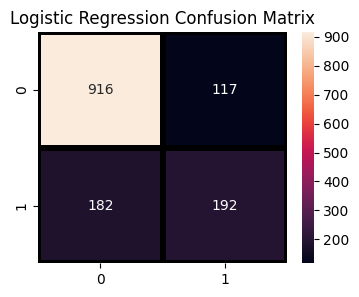

In [40]:
# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_lr, annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

True Negative (TN): 916

False Positive (FP): 117

False Negative (FN): 182

True Positive (TP):192 

Logistic Regression Error Rate: (117 + 182) / (916 + 117 + 182 + 192) = 0.2125 or 21.25%

Random Forest Confusion Matrix

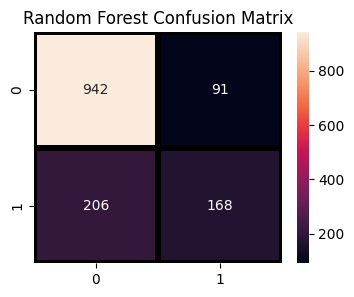

In [41]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_rf, annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("Random Forest Confusion Matrix")
plt.show()

True Negative (TN): 942

False Positive (FP): 91

False Negative (FN): 206

True Positive (TP): 168

Random Forest Error Rate: (91 + 206) / (942 + 91 + 206 + 168) = 0.228 or 22.8%

SVM Confusion Matrix

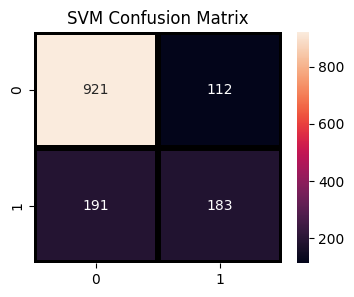

In [42]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("SVM Confusion Matrix")
plt.show()

True Negative (TN): 921

False Positive (FP): 112

False Negative (FN): 191

True Positive (TP): 183

SVM Error Rate: (112 + 191) / (921 + 112 + 191 + 183) = 0.227 or 22.7%

Decision Tree Confusion Matrix

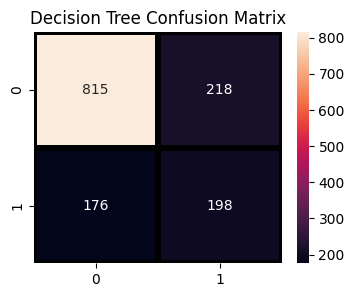

In [43]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix_dt, annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("Decision Tree Confusion Matrix")
plt.show()

True Negative (TN): 815

False Positive (FP): 218

False Negative (FN): 176

True Positive (TP): 198

Decision Tree Error Rate: (218 + 176) / (815 + 218 + 176 + 198) =0.28 or 28.00%

ROC Curve Plot

The Receiver Operating Characteristic (ROC) plot is a graphical representation of the performance of a classification model. It displays the relationship between the True Positive Rate (TPR) and the False Positive Rate (FPR) as the classification threshold varies.

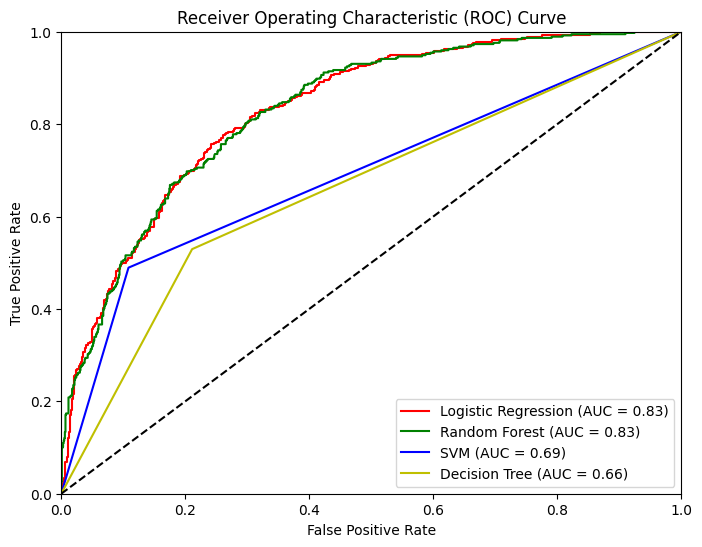

In [44]:
# Calculate False Positive Rate (FPR) and True Positive Rate (TPR) for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_pred)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pred)

# Calculate Area Under the Curve (AUC) for each model
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)
auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % auc_lr, color='r')
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf, color='g')
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % auc_svm, color='b')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % auc_dt, color='y')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve for Logistic Regression is nearer to the top-left corner of the plot, implying that it has a better performance than other models. AUC value of 0.83 implies that the Logistic Regression model is able to differentiate the positive classes from negative classes.

Random Forest (AUC = 0.83):
The ROC curve for Random Forest is almost coinciding with the Logistic Regression curve. Its AUC value suggests model's distinguishing capability similar to logistic regression.

SVM (AUC = 0.69):
The ROC curve for SVM lies below the random forest model  throughout. Its AUC value of 0.69 means lower discriminating ability than the Random Forest model.

Decision Tree (AUC = 0.65):
Its ROC curve is the furthest from the top left corner. Its AUC value of 0.65 turns out to be the lowest. The Decision Tree model has a limited ability to distinguish between the positive and negative classes.

In summary, the ROC plot allows us to compare the performance of different classification models based on their AUC values. A higher AUC value indicates a better discriminatory ability of the model, while a lower AUC value suggests a weaker performance. In this case, the Logistic Regression model and Random Forest model demonstrate the highest AUC value, indicating their superior performance compared to the other models.

ANN Model Evaluation

For model evaluation we will use test data.

In [45]:
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.dtype)
print(y_test.dtype)
X_test = X_test.astype('float32')
y_test = y_test.astype('int32')
# Evaluate the model on the test set
loss, accuracy = model_ann.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

float32
int32
44/44 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.7804
Loss: 0.4943535029888153
Accuracy: 0.7803837656974792


The ANN model has thrown up a loss of 0.4944   and an accuracy of 0.7804.
Lower loss values indicates the model fits the data well. The accuracy of approximately 0.7804 implies that the model correctly predicts the churn status for about 78% of the customers in the test set.

verifing the ANN model predictions on test data.

In [46]:
predictions = model_ann.predict(X_test)
predictions[:5]

44/44 [==============================] - 0s 3ms/step


array([[0.00193265],
       [0.09006204],
       [0.7445948 ],
       [0.05213553],
       [0.2942731 ]], dtype=float32)

 The predictions on the test data are in 2D array with values ranging from 0 to 1. So in order to get the binary format we will use 0.5 threshold, so anything more than 0.5 will be 1(churn-yes) else 0(churn-no)

In [47]:
y_pred = []

for val in predictions:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
            
y_pred[:10]

[0, 0, 1, 0, 0, 1, 0, 1, 0, 0]

compairing true values and predicted values 

In [48]:
my_data_true_pred = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}) 
my_data_true_pred[:10]

,y_test,y_pred
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,1
6,0,0
7,0,1
8,0,0
9,0,0


Compairing the accuracy scores of all the models

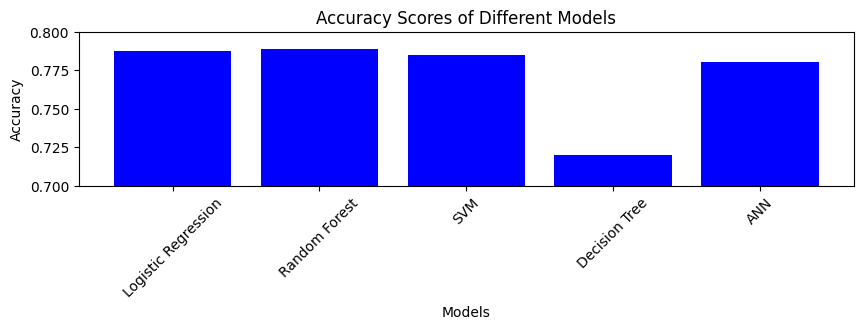

In [49]:
# Accuracy scores of the models
accuracy_scores = [accuracy_lr, accuracy_rf, accuracy_svm, accuracy_dt, accuracy_ann]

# Model names
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'ANN']

# Create a bar plot
plt.figure(figsize=(10,2))
plt.bar(model_names, accuracy_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')
plt.ylim([0.7, 0.8])  # Set the y-axis limits according to your data
plt.xticks(rotation=45)

# Display the plot
plt.show()

The bar plot shows that Random Forest model has the highest accuracy, which is follwed by Logistic Regression, SVM, ANN and Decision Tree model in that order.

# Conclusion

Overall, the accuracy scores for the different models are all relatively high. This implies that all of the models are good at predicting customer churn. However, the Random Forest model has the highest accuracy score, followed by the Logistic Regression model, the SVM model, the ANN model and the decision tree model in that order.

Comparing the error ratings of the models, the Logistic Regression has the lowest error rate, which is followed by the SVM model,  the Random Forest model, and  the Decision Tree model which has the highest error rate. Therefore, based on the training dataset, the Logistic Regression model performs the best in terms of missclassification error being the least.

According to the ROC, the Logistic Regression and Random Forest models have the highest AUC values,so they have superior performance compared to the other models.

# References

[Kaggle Notebook1](https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction),
[Kaggle Notebook2](https://www.kaggle.com/code/satishgunjal/ann-to-predict-telco-customer-churn),
[Kaggle Notebook3](https://www.kaggle.com/code/nutkanibloch/customer-churn-by-ann),
[Kaggle Notebook4](https://www.kaggle.com/code/chinpattara/customer-churn-eda-modeling),
[GitHub](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/11_chrun_prediction/churn.ipynb)